# 🤖 Neural Network Model Testing
This notebook tests the trained neural network model (`neural_network_model.pkl`) on the phishing URL dataset.

In [2]:
# ✅ Step 1: Import libraries
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix


In [6]:
# ✅ Step 2: Load model and scaler
model = joblib.load("../model/neural_network_model.pkl")
scaler = joblib.load("../model/scaler.pkl")
print("Model and scaler loaded ✅")


Model and scaler loaded ✅


In [8]:
# ✅ Step 3: Load and prepare data
df = pd.read_csv("../data/urlData.csv")
df.dropna(inplace=True)

# Drop 'Label' and 'Domain'
X = df.drop(['Label', 'Domain'], axis=1)
y = df['Label']

# Scale features
X_scaled = scaler.transform(X)
print("Data loaded and scaled ✅")


Data loaded and scaled ✅


In [9]:
# ✅ Step 4: Predict and compare first 5 samples
y_pred = model.predict(X_scaled[:5])
actual = y[:5].tolist()

for i in range(5):
    print(f"Sample {i+1}:")
    print("  🔹 Actual:", "Phishing" if actual[i] == 1 else "Legitimate")
    print("  🔸 Predicted:", "Phishing" if y_pred[i] == 1 else "Legitimate")
    print("---")


Sample 1:
  🔹 Actual: Legitimate
  🔸 Predicted: Legitimate
---
Sample 2:
  🔹 Actual: Legitimate
  🔸 Predicted: Legitimate
---
Sample 3:
  🔹 Actual: Legitimate
  🔸 Predicted: Legitimate
---
Sample 4:
  🔹 Actual: Legitimate
  🔸 Predicted: Legitimate
---
Sample 5:
  🔹 Actual: Legitimate
  🔸 Predicted: Legitimate
---


In [11]:
# ✅ Step 5: Evaluate the full model
y_full_pred = model.predict(X_scaled)

print("Accuracy:", accuracy_score(y, y_full_pred))
print("F1 Score:", f1_score(y, y_full_pred))
print("\nClassification Report:")
print(classification_report(y, y_full_pred))


Accuracy: 0.9615673322323975
F1 Score: 0.9599958328992604

Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     10000
           1       1.00      0.92      0.96      9983

    accuracy                           0.96     19983
   macro avg       0.96      0.96      0.96     19983
weighted avg       0.96      0.96      0.96     19983



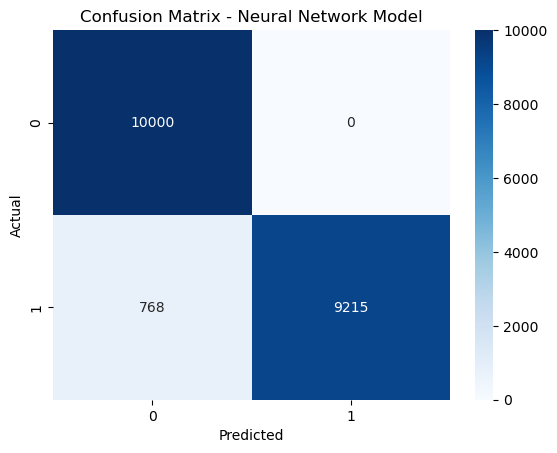

In [12]:
# ✅ Step 6: Plot Confusion Matrix
cm = confusion_matrix(y, y_full_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Neural Network Model")
plt.show()
